<a href="https://colab.research.google.com/github/medinadiegoeverardo/DS-Unit-2-Applied-Modeling/blob/master/module3/medinadiego_3_assignment_applied_modeling_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Applied Modeling, Module 3

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploration, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Share at least 1 visualization on Slack.

(If you have not yet completed an initial model yet for your portfolio project, then do today's assignment using your Tanzania Waterpumps model.)

## Stretch Goals
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox.I Get readable category names on your plot, instead of integer category codes.

## Links
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

In [0]:
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pip install category_encoders==2.*
!pip install pdpbox

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/AB_NYC_2019.csv')

In [0]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [0]:
df['last_review'] = pd.to_datetime(df['last_review'], infer_datetime_format=True) # needed to separate dates

In [0]:
# dropping these
cutoff = '2018-09-07'
#new_df = df.loc[df['last_review'] > cutoff] # what is the better way to do this (not using .copy())
new_df = df[df['last_review'] > cutoff]

In [0]:
sorted_df = new_df.sort_values(by='last_review').reset_index()# sorted_df = new_df.sort_values(by='last_review') # in order (time series dataset)
train = sorted_df[sorted_df.index < (0.85 * len(sorted_df))] # give me the indices that less than 23721
# get 1 - 23721

#sorted_df[sorted_df.index < (0.85 * len(sorted_df))]
test = sorted_df[sorted_df.index > (.85 * len(sorted_df))] # give me those "above" 23721

In [0]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, random_state=10)

train = train.copy()
val = val.copy()
test = test.copy()

In [0]:
def separating_date(df):
  df['month'] = df['last_review'].dt.month
  df['year'] = df['last_review'].dt.year
  df['day'] = df['last_review'].dt.day

separating_date(train)
separating_date(val)
separating_date(test)

In [0]:
to_drop = ['index', 'id', 'name', 'host_id', 'host_name', 'last_review']
train = train.drop(columns=to_drop)
val = val.drop(columns=to_drop)
test = test.drop(columns=to_drop)

In [0]:
target = 'price'
y_train = train[target]
y_test = test[target]
y_val = val[target]
x_train = train.drop(columns=target)
x_val = val.drop(columns=target)
x_test = test.drop(columns=target)

In [0]:
from sklearn.metrics import r2_score
import category_encoders as ce
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_val)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [0]:
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

Gradient Boosting R^2 0.21923271644094422


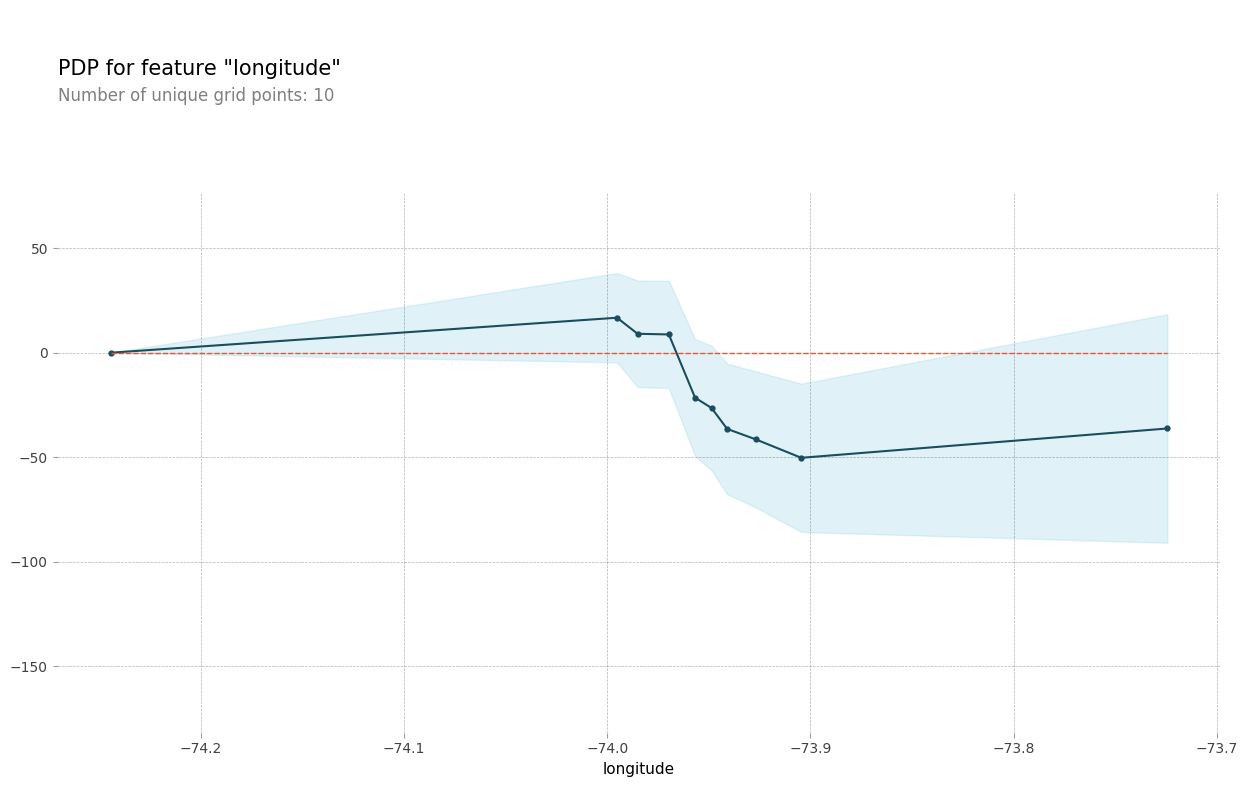

In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'longitude'

isolated = pdp_isolate(
    model=pipeline, 
    dataset=x_val, 
    model_features=x_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

# Copy / Pasted the first section from another notebook to verify it works / gives me the same result (won't be using what's above this)

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/AB_NYC_2019.csv')

In [0]:
df['last_review'] = pd.to_datetime(df['last_review'], infer_datetime_format=True) # needed to separate dates

In [0]:
cutoff = '2018-09-07'
new_df = df[df['last_review'] > cutoff]
# splitting for test, train and val

In [0]:
new_df.shape

(27908, 16)

In [0]:
sorted_df = new_df.sort_values(by='last_review').reset_index() # sort by earliest to most recent

In [0]:
train = sorted_df[sorted_df.index < (0.85 * len(sorted_df))] # give me the indices that less than 23721
test = sorted_df[sorted_df.index > (.85 * len(sorted_df))] # give me those "above" 23721

In [0]:
test.shape, train.shape

((4186, 17), (23722, 17))

In [0]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, random_state=10)

# even though I randomly split train to have a train and val set, the train/test
# split is not random. the test set has more recent data

In [0]:
train.shape, val.shape

((17791, 17), (5931, 17))

In [0]:
train = train.copy()
val = val.copy()
test = test.copy()

def separating_date(df):
  df['month'] = df['last_review'].dt.month
  df['year'] = df['last_review'].dt.year
  df['day'] = df['last_review'].dt.day

separating_date(train)
separating_date(val)
separating_date(test)

In [0]:
import numpy as np
# train = train.copy()
# test = test.copy()
# val = val.copy()
train['log_price'] = np.log1p(train['price'])
val['log_price'] = np.log1p(val['price'])
test['log_price'] = np.log1p(test['price'])

In [0]:
# to_drop = ['index', 'id', 'name', 'host_id', 'host_name', 'last_review', 'price', 'log_price']
# train = train.drop(columns=to_drop)
# val = val.drop(columns=to_drop)
# test = test.drop(columns=to_drop)

In [0]:
features = ['neighbourhood_group', 'neighbourhood', 'latitude',
 'longitude',
 'room_type',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [0]:
target = 'log_price'
y_train = train[target]
y_test = test[target]
y_val = val[target]

x_train = train[features]
x_val = val[features]
x_test = test[features]

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score

new_pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    RandomForestRegressor(n_estimators=10, random_state=10)
)

new_pipeline.fit(x_train, y_train)
# print('Validation Accuracy', pipeline.score(x_val, y_val)) # is accuracy is a good metric in this case?

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['neighbourhood_group', 'neighbourhood',
                                      'room_type'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'neighbourhood_group',
                                          'data_type': dtype('O'),
                                          'mapping': Manhattan        1
Queens           2
Brooklyn         3
Staten Island    4
Bronx            5
NaN             -2
dtype: int64},
                                         {'col': 'neighbourhood',
                                          'data_ty...
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_

In [0]:
# mae and r2 scores
from sklearn.model_selection import cross_validate
full_scores = cross_validate(new_pipeline, x_train, y_train,
                                  scoring=['neg_mean_absolute_error', 'r2'],
                                  cv=3)

In [0]:
full_scores

In [0]:
scores = cross_val_score(new_pipeline, x_train, y_train,
                                  scoring='neg_mean_absolute_error',
                                  cv=3)

In [0]:
-scores

In [0]:
scores_r2 = cross_val_score(new_pipeline, x_train, y_train,
                                  scoring='r2',
                                  cv=3)

In [0]:
scores_r2

## PDP

In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

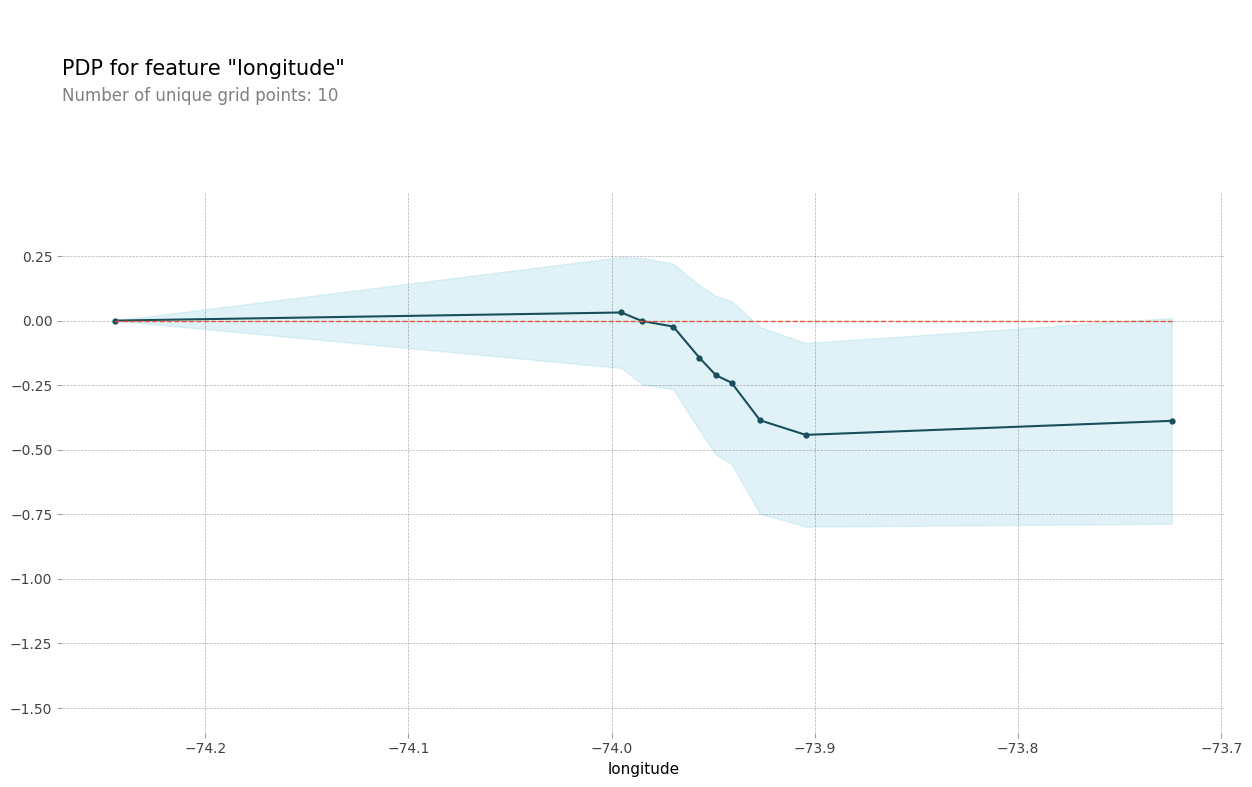

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'longitude'

isolated = pdp_isolate(
    model=new_pipeline, 
    dataset=x_val, 
    model_features=x_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

(<Figure size 1500x950 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f8983718470>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f8985f839b0>})

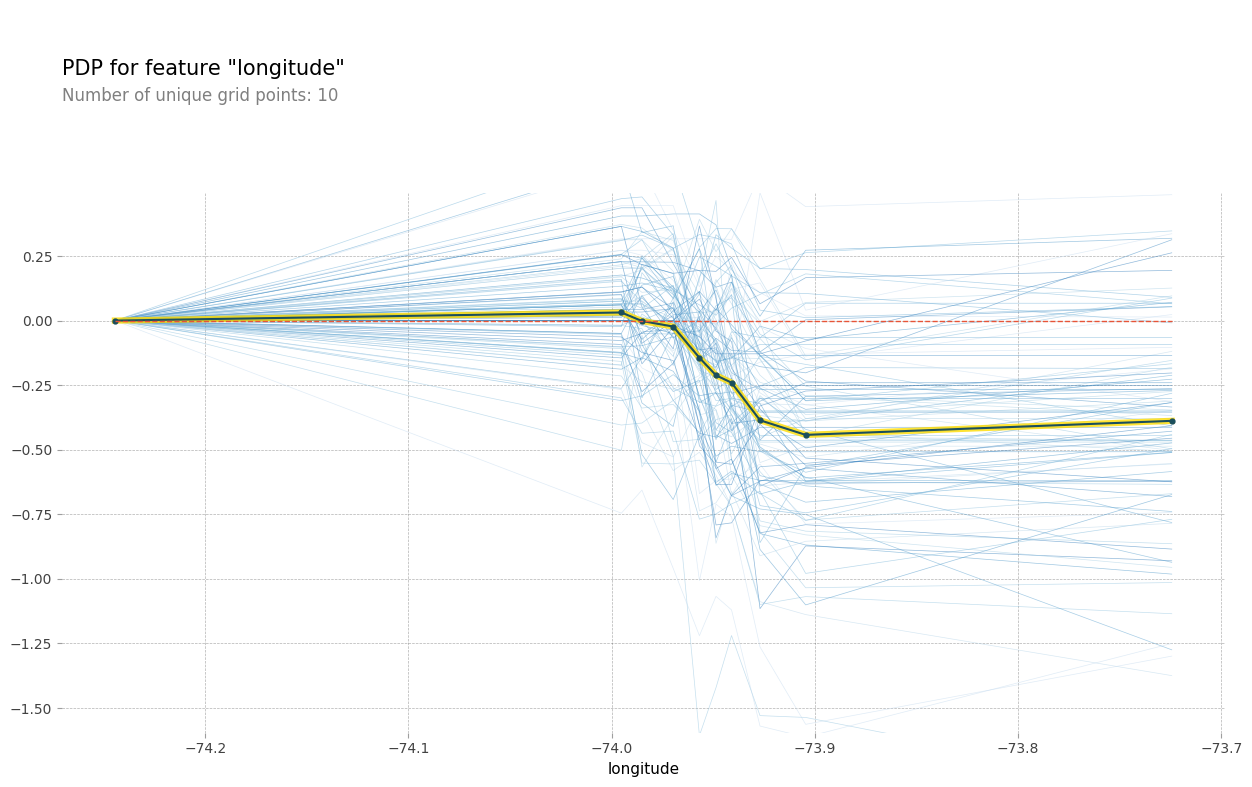

In [0]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100) # Confusing parameter name
#plt.xlim(0,150000);

In [0]:
# Number of predictions required to make a PDP with 1 feature
# given the size of your dataset, and the number of grid points:
len(x_val) * 10

59310

## 2 features

In [0]:
x_val.columns.tolist()

['neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

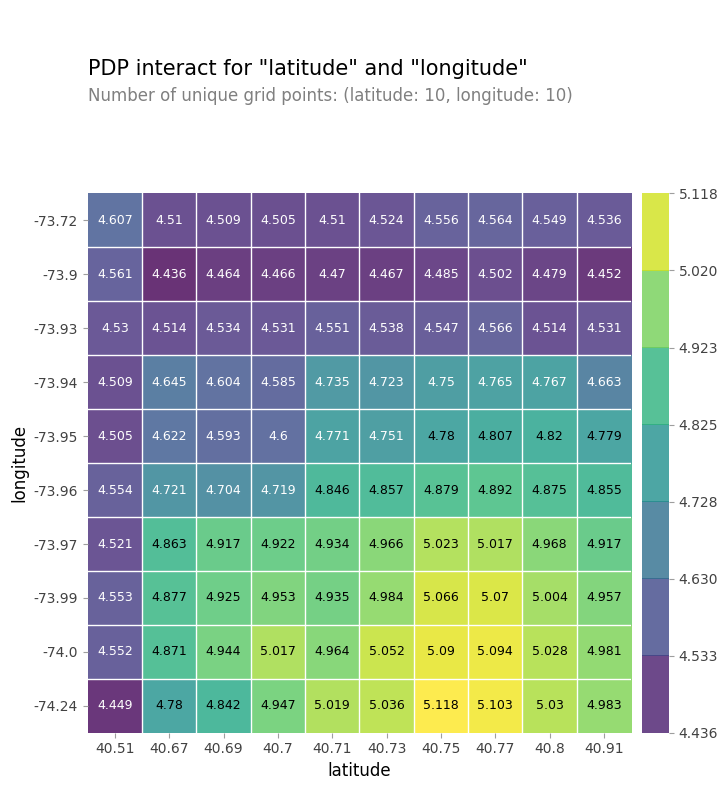

In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
feat = ['latitude', 'longitude']

two_feat = pdp_interact(
    model=new_pipeline, 
    dataset=x_val, 
    model_features=x_val.columns, 
    features=feat
)

pdp_interact_plot(two_feat, plot_type='grid', feature_names=feat);